<a href="https://colab.research.google.com/github/sallumandya1995/datascience/blob/master/assemblyai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

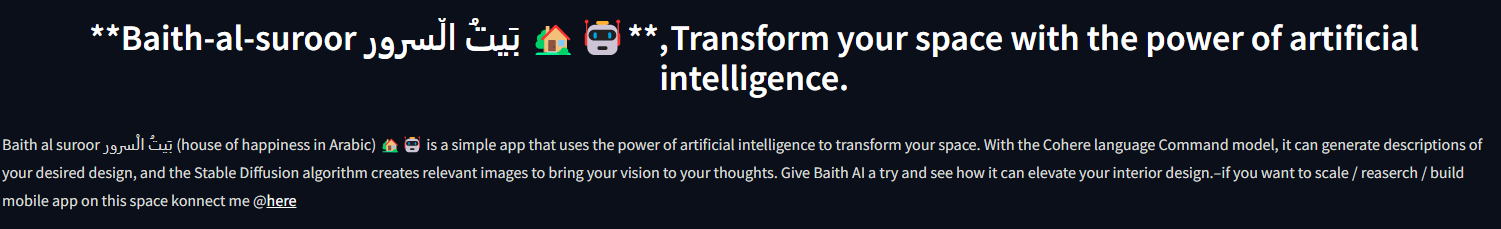

In [ ]:
!nvidia-smi
 

Load the pipeline

 **Cohere one shot lerning capbility**
 
 
Using power of Cohere's command model to write a detailed caption of an image describing the interior design of living room and letting stable diffusion do the remaining magic
 

In [ ]:
#@title init libraries for GPu
!pip install -qq cohere
!pip install -qq gradio
!pip install -qq accelerate
!pip install -qq diffusers==0.8.0   ftfy
!pip install -qq "ipywidgets>=7,<8"
 
!pip install git+https://github.com/huggingface/transformers
import inspect
import warnings
from typing import List, Optional, Union

import torch
from torch import autocast
from tqdm.auto import tqdm

from diffusers import StableDiffusionImg2ImgPipeline
  
import random
import inspect
import warnings
from typing import List, Optional, Union

import torch
from torch import autocast
from tqdm.auto import tqdm

from diffusers import StableDiffusionImg2ImgPipeline

import requests
import os
 
from IPython.display import Image, display
import cohere

from huggingface_hub import notebook_login
import inspect
import warnings
from typing import List, Optional, Union

import torch
from torch import autocast
from tqdm.auto import tqdm

from diffusers import StableDiffusionImg2ImgPipeline
import inspect
import warnings
from typing import List, Optional, Union
 

 

!python -c "from huggingface_hub.hf_api import HfFolder; HfFolder.save_token('xxxxxxxxxxxxxxxx')" #pass huggingface token as arguement

 
co = cohere.Client('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')   #use your cohere api inside

os.system("gdown https://drive.google.com/uc?id=1mT9ewx86PSrc43b-ax47l1E2UzR7Ln4j -O RealESRGAN_x8.pth")
device = "cuda"
model_path = "prompthero/midjourney-v4-diffusion"
model_path="stabilityai/stable-diffusion-2"

model_path = "CompVis/stable-diffusion-v1-4"

pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    model_path,
#     revision="fp16",  # comment for prompt hero version
    torch_dtype=torch.float16
    ,use_auth_token=True
)
pipe = pipe.to(device)


#upscalers

!git clone https://huggingface.co/spaces/Xhaheen/Face-Real-ESRGAN
!pip install -q gdown gradio
!cp -r Face-Real-ESRGAN/. .

# %cd Face-Real-ESRGAN